# Диплом

Доработка: выводы по п.3-4,  6-9:
        3-4: Поскольку коэффициенты корреляции очень малы , к тому же они не всегда означают безусловную зависимость, на графиках видно, что ее практически и нет.
6-9: Больше всего работников в продажах, IT и тех департаментах, меньше всего в менеджменте и у них самый высокий заработок, также неплохой у тех поддержки. Текучка довольно большая (3,5 тыс против 11,5- это около четверти)
5:
P-value везде <0.05, следовательно,  ни одна зависимость из представленных не описывается теоремой Гаусса и распределение не является нормальным.
Поскольку коэффициенты корреляции очень малы , к тому же они не всегда означают безусловную зависимость, гипотезы о вышеперечисленных зависимостях не верны. 
10: 
почему сотрудники покидают компанию: 

Ни линейные, ни полиномиальные регрессии от одного рода данных согласно корреляции, ни дерево решений, (которое даже не стала оставлять для сравнения), не дали объективных показателей во-первых, из-за того, что зависимая переменная y является вероятностью 0 или 1. Следовательно, подходит логистическая регрессия и от всех параметров(за исключением департаментов, так как они ни на что не влияют. Все остальное важно, в том числе зп, и так как она распределена в виде строковых данных, ее необходимо перевести во float и включить в выборку x как 1,2 3 либо 100,200,300 соответственно (малая, средняя, большая зп - 3 вида). 
В результате наконец удалось построить модель со средними показателями. Следовательно, все данные, участвовавшие в выборке (все с небольшими корреляциями) влияют на решение работника покинуть компанию - это и уровень зп, и время, затраченное на проекты, их количество, время работы в компании, повышение и тд .
Качество модели не особо высокое - не более 80%, но это все, что можно «выжать» из имеющихся данных.
#accuracy - сколько % модель верно распознала на тестовых
#precision - сколько % из тех, кого мы назвали 1(уволившимися/уволенными), на самом деле уволившиеся/уволенные
#recall- наоборот от precision

Нельзя сказать, что больше всего на решение покинуть компанию влияют корреляционные по Пирсону переменные, потому что accuracy на 2% меньше, чем при использовании всех признаков. Следовательно - все они важны в некоторых долях.


Проектная работа по модулю “Математика и статистика в Python”


1.Загрузить файл hr.csv.


In [24]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline
url="hr.csv"
df=pd.read_csv(url)
df[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


среднее последней оценки

In [25]:
statistics.mean(df['last_evaluation'])
sum(df['last_evaluation'])/len(df['last_evaluation'])

0.7161017401159978

медиана последней оценки

In [26]:
print('Медиана: ', statistics.median(df['last_evaluation']))

Медиана:  0.72


мода

In [27]:
print('Значение моды: ', statistics.mode(df['last_evaluation']))

Значение моды:  0.55


мин

In [28]:
#df.min('last_evaluation')
df['last_evaluation'].dtype
min(df['last_evaluation'])

0.36

макс

In [29]:
max(df['last_evaluation'])

1.0

стандартное отклонение

In [30]:
df['last_evaluation'].std()

0.17116911062327592

3.Рассчитать и визуализировать корреляционную матрицу для переменных.


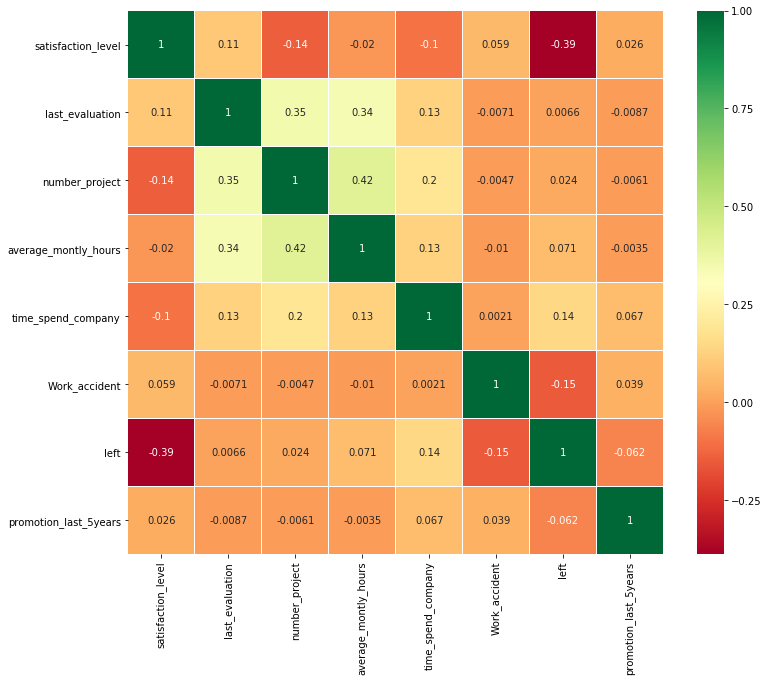

In [31]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()


In [32]:
corr = df.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.11,-0.14,-0.02,-0.1,0.06,-0.39,0.03
last_evaluation,0.11,1,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1,0.42,0.2,-0,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1,0.13,-0.01,0.07,-0
time_spend_company,-0.1,0.13,0.2,0.13,1,0,0.14,0.07
Work_accident,0.06,-0.01,-0,-0.01,0,1,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0,0.07,0.04,-0.06,1


4.Визуализировать несколько взаимосвязей между переменными.
- наибольшая корреляция наблюдается у покинутых компанию и уровнем удовлетворенности, а также количества проектов и затраченных часах ежемесячно,  также у последней оценки по проектам и затраченных часах, количества проектов
Однако при визуализации связь практически не улавливается

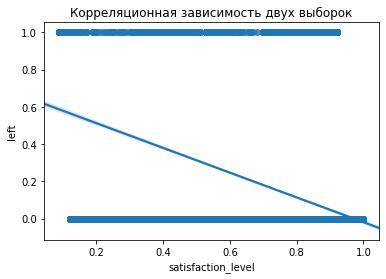

In [33]:
satisfaction_level = df['satisfaction_level']
left = df['left']
sns.regplot(x= satisfaction_level, y=left,data=df, fit_reg=True)
plt.xlabel('satisfaction_level')
plt.ylabel('left')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

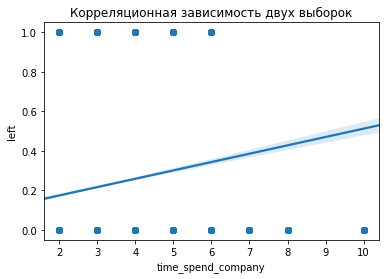

In [34]:
satisfaction_level = df['time_spend_company']
left = df['left']
sns.regplot(x= satisfaction_level, y=left,data=df, fit_reg=True)
plt.xlabel('time_spend_company')
plt.ylabel('left')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

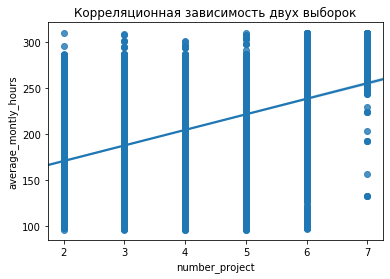

In [35]:
satisfaction_level = df['number_project']
left = df['average_montly_hours']
sns.regplot(x= satisfaction_level, y=left,data=df, fit_reg=True)
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [36]:
female_bps = df[df['left']==0]['satisfaction_level']
stats.ttest_1samp(female_bps, df['satisfaction_level'].mean())
#df.head()


Ttest_1sampResult(statistic=26.577799941338373, pvalue=4.5259233104965264e-151)

In [37]:
df=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', \
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'salary']]
df.loc[df['salary'] == 'low','salary'] = 100
df.loc[df['salary'] == 'medium','salary'] = 200
df.loc[df['salary'] == 'high','salary'] = 300
female_bps = df[df['left']==0]['salary']
stats.ttest_1samp(female_bps, df['salary'].mean())

Ttest_1sampResult(statistic=9.174777863793503, pvalue=5.2991439353178945e-20)

In [38]:
female_bps = df[df['left']==0]['last_evaluation']
stats.ttest_1samp(female_bps, df['last_evaluation'].mean())


Ttest_1sampResult(statistic=-0.41462217089718184, pvalue=0.6784262985443781)

In [39]:
female_bps = df[df['left']==0]['number_project']
stats.ttest_1samp(female_bps, df['number_project'].mean())

Ttest_1sampResult(statistic=-1.7880036722437305, pvalue=0.07380190299817418)

6.Рассчитать сколько работников работает в каждом департаменте.


In [40]:
df = pd.read_csv("hr.csv")
df.groupby(by='sales')['sales'].count()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: sales, dtype: int64

7.Показать распределение сотрудников по зарплатам.


In [41]:
df['salary'].value_counts()
df.groupby(by=[ 'salary'])['salary'].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

8.Показать распределение сотрудников по зарплатам совместно с департаментами.


In [42]:
df['salary'].value_counts()
df.groupby(by=['sales', 'salary'])['salary'].count()

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

9.Сколько сотрудников покинули компанию.


In [43]:
df[df['left'] == 1].shape[0]
#df[df['left'] == 0].shape[0]

3571

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
- наибольшая корреляция наблюдается у покинутых компанию и уровнем удовлетворенности, а также количества проектов и затраченных часах ежемесячно
Однако построив линейную регрессию стало видно, что явной зависимости не наблюдается.
Полиномиальная регрессия позволила построить модель c точностью около 50%

In [44]:
#Предже всего приведем к нормальной форме зп из строковых
df=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', \
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'salary']]
df.loc[df['salary'] == 'low','salary'] = 100
df.loc[df['salary'] == 'medium','salary'] = 200
df.loc[df['salary'] == 'high','salary'] = 300
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,100
1,0.80,0.86,5,262,6,0,1,0,200
2,0.11,0.88,7,272,4,0,1,0,200
3,0.72,0.87,5,223,5,0,1,0,100
4,0.37,0.52,2,159,3,0,1,0,100


In [45]:
#1. зависимость между покинувшими компанию и уровнем удовлетворенности работой в компании (корреляция =-0.39)
df.sort_values(by=['satisfaction_level'], inplace=True)
X = df[['satisfaction_level']]
y = df[['left']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)
X_train_lstat = X_train[['satisfaction_level']]
X_test_lstat = X_test[['satisfaction_level']]
X_train_lstat = np.array(X_train_lstat).reshape(-1, 1)
X_test_lstat = np.array(X_test_lstat).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_lstat, y_train)
model.score(X_test_lstat, y_test)

0.15570107176134418

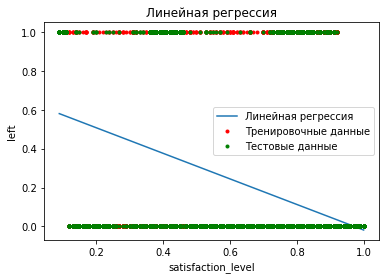

In [46]:
plt.xlabel('satisfaction_level')
plt.ylabel('left')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_lstat), max(X_train_lstat), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_lstat, y_train, 'r.')
plt.plot(X_test_lstat, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [47]:
#возможно полиномиальная отразит лучше
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=30)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.4855532894671194

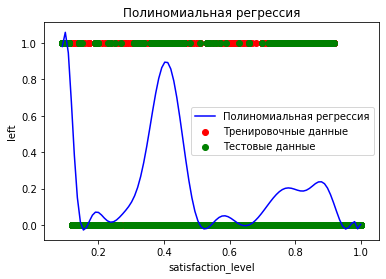

In [48]:
plt.scatter(X_train_lstat, y_train, c='red')
plt.scatter(X_test_lstat, y_test, c='green')
x = np.linspace(min(X_test_lstat), max(X_train_lstat), 100)
y = pol_reg.predict(poly_reg.fit_transform(x))
plt.plot(x, y, 'b')
plt.title('Полиномиальная регрессия')
plt.xlabel('satisfaction_level')
plt.ylabel('left')
plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

2. зависимость между покинувшими компанию и времени работы в компании (корреляция =0.14)

In [49]:
df.sort_values(by=['time_spend_company'], inplace=True)
X = df[['time_spend_company']]
y = df[['left']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)
X_train_lstat = X_train[['time_spend_company']]
X_test_lstat = X_test[['time_spend_company']]
X_train_lstat = np.array(X_train_lstat).reshape(-1, 1)
X_test_lstat = np.array(X_test_lstat).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_lstat, y_train)
model.score(X_test_lstat, y_test)

0.01973583351977959

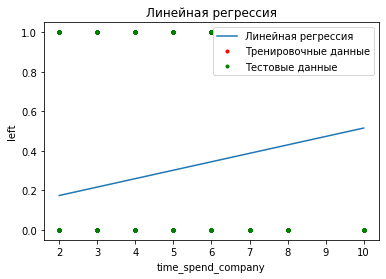

In [50]:
plt.xlabel('time_spend_company')
plt.ylabel('left')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_lstat), max(X_train_lstat), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_lstat, y_train, 'r.')
plt.plot(X_test_lstat, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [51]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=9)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.1386969689733829

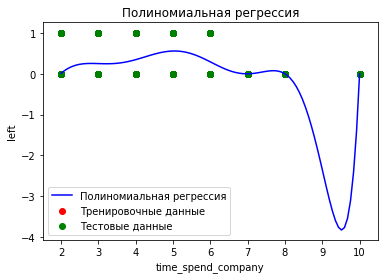

In [52]:
plt.scatter(X_train_lstat, y_train, c='red')
plt.scatter(X_test_lstat, y_test, c='green')
x = np.linspace(min(X_test_lstat), max(X_train_lstat), 100)
y = pol_reg.predict(poly_reg.fit_transform(x))
plt.plot(x, y, 'b')
plt.title('Полиномиальная регрессия')
plt.xlabel('time_spend_company')
plt.ylabel('left')
plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [53]:
#3. зависимость между покинувшими компанию и происшествиями на работе (корреляция =-0.15)
df.sort_values(by=['Work_accident'], inplace=True)

X = df[['Work_accident']]
y = df[['left']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 42
)
X_train_lstat = X_train[['Work_accident']]
X_test_lstat = X_test[['Work_accident']]
X_train_lstat = np.array(X_train_lstat).reshape(-1, 1)
X_test_lstat = np.array(X_test_lstat).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_lstat, y_train)
model.score(X_test_lstat, y_test)

0.01847827328518803

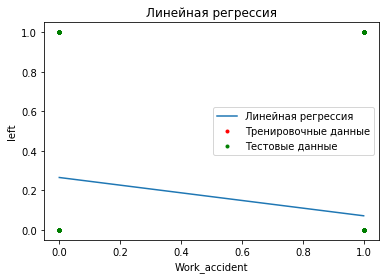

In [54]:
plt.xlabel('Work_accident')
plt.ylabel('left')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_lstat), max(X_train_lstat), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_lstat, y_train, 'r.')
plt.plot(X_test_lstat, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=5)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.01847827328518814

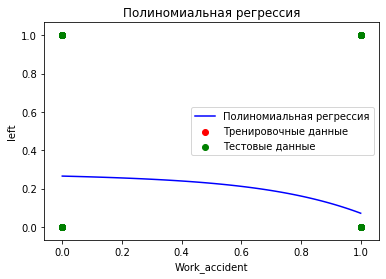

In [56]:
plt.scatter(X_train_lstat, y_train, c='red')
plt.scatter(X_test_lstat, y_test, c='green')
x = np.linspace(min(X_test_lstat), max(X_train_lstat), 100)
y = pol_reg.predict(poly_reg.fit_transform(x))
plt.plot(x, y, 'b')
plt.title('Полиномиальная регрессия')
plt.xlabel('Work_accident')
plt.ylabel('left')
plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [57]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
12058,0.38,0.54,2,128,3,0,1,0,100
6110,0.86,0.56,5,237,3,0,0,0,100
9206,0.51,0.51,4,189,3,0,0,0,100
10035,0.51,0.72,3,242,3,0,0,0,100
2946,0.51,0.79,5,267,3,0,0,0,200


In [58]:
#попробуем через логистическую регрессию - точность увеличилась
X = df[['Work_accident', 'satisfaction_level', 'last_evaluation', 'number_project',\
        'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'salary']]
y = df[['left']]
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2305
           1       0.57      0.33      0.42       695

    accuracy                           0.79      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000



/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
#попробуем через логистическую регрессию - точность увеличилась
X = df[['average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'salary']]
y = df[['left']]
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2305
           1       0.00      0.00      0.00       695

    accuracy                           0.75      3000
   macro avg       0.38      0.49      0.43      3000
weighted avg       0.59      0.75      0.66      3000



/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
'Work_accident', 'satisfaction_level', 'last_evaluation', 'number_project',\

In [65]:
#попробуем через логистическую регрессию - точность увеличилась
X = df[[ 'satisfaction_level', 'time_spend_company']]
y = df[['left']]
from sklearn.linear_model import LogisticRegression

# разделим на тренировочные данные и на тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2305
           1       0.49      0.25      0.33       695

    accuracy                           0.77      3000
   macro avg       0.65      0.59      0.59      3000
weighted avg       0.73      0.77      0.74      3000



/Users/natalaurina/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете